In [1]:
import numpy as np
from network_simulator import NetworkSimulator

/home/jonat/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
m = [1, 1, 1, 1, 5, 5]
l = [1, 1, 1, 1, 0.1]
l1, l2, l3, l4, l5 = l
g = 9.81

dt = 0.01
tf = 20

Q_0 = np.array([[1.1, 0], [-0.9, 0], [-1, 0], [1, 0], [0.1, 0], [0, 0]])
Q_dot_0 = np.array([[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]])

n = 6
k = lambda t: 4 if t > 10 else 5
max_k = 5

kp = [40, 40, 40, 40, 20, 20]
kd = [40, 40, 40, 40, 20, 20]

D_of_G = lambda k: np.array([[ 1,  0,  0,  0,  0],
                                [ 0,  1,  0,  0,  0],
                                [ 0,  0,  1,  0,  0],
                                [ 0,  0,  0,  1,  0],
                                [-1, -1,  0,  0,  1],
                                [ 0,  0, -1, -1, -1]])[:, :k]

Q_d = lambda t, k: np.array([[0, 0], [0, 0], [0, 0], [0, 0], [0, l5], [0, 0]]) if k == 5 else np.array([[0, 0], [0, 0], [0, 0], [0, 0], [0, 1], [0, -1]])
Q_d_dot = lambda t, k: np.array([[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]) if k == 5 else np.array([[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]])

theta_d = lambda t: np.pi/4*np.cos(np.pi/2*t)
theta_d_dot = lambda t: -np.pi**2/8*np.sin(np.pi/2*t)
theta_d_ddot = lambda t: -np.pi**3/16*np.cos(np.pi/2*t)
Qe_d = lambda t, k: np.array([[l1*np.cos(theta_d(t)), l1*np.sin(theta_d(t))],
                          [-l2*np.cos(theta_d(t)), l2*np.sin(theta_d(t))],
                          [-l3*np.cos(theta_d(t)), -l3*np.sin(theta_d(t))],
                          [l4*np.cos(theta_d(t)), -l4*np.sin(theta_d(t))],
                          [0, l5]])[:k, :]
Qe_d_dot = lambda t, k: np.array([[-l1*np.sin(theta_d(t))*theta_d_dot(t), l1*np.cos(theta_d(t))*theta_d_dot(t)],
                              [l2*np.sin(theta_d(t))*theta_d_dot(t), l2*np.cos(theta_d(t))*theta_d_dot(t)],
                              [l3*np.sin(theta_d(t))*theta_d_dot(t), -l3*np.cos(theta_d(t))*theta_d_dot(t)],
                              [-l4*np.sin(theta_d(t))*theta_d_dot(t), -l4*np.cos(theta_d(t))*theta_d_dot(t)],
                              [0, 0]])[:k, :]
Qe_d_ddot = lambda t, k: np.array([[-l1*np.cos(theta_d(t))*theta_d_dot(t)**2-l1*np.sin(theta_d(t))*theta_d_ddot(t), l1*np.sin(theta_d(t))*theta_d_dot(t)**2-l1*np.cos(theta_d(t))*theta_d_ddot(t)], # Unckecked!
                               [l2*np.cos(theta_d(t))*theta_d_dot(t)**2+l2*np.sin(theta_d(t))*theta_d_ddot(t), -l2*np.sin(theta_d(t))*theta_d_dot(t)**2-l2*np.cos(theta_d(t))*theta_d_ddot(t)],
                               [l3*np.cos(theta_d(t))*theta_d_dot(t)**2+l3*np.sin(theta_d(t))*theta_d_ddot(t), -l3*np.sin(theta_d(t))*theta_d_dot(t)**2+l3*np.cos(theta_d(t))*theta_d_ddot(t)],
                               [-l4*np.cos(theta_d(t))*theta_d_dot(t)**2-l4*np.sin(theta_d(t))*theta_d_ddot(t), l4*np.sin(theta_d(t))*theta_d_dot(t)**2+l4*np.cos(theta_d(t))*theta_d_ddot(t)],
                               [0, 0]])[:k, :]

control_type = (1, 2, 3, 4, None, None)

sim = NetworkSimulator(n, k, max_k, m, l, g, D_of_G, dt, tf, Q_0, Q_dot_0, Q_d, Q_d_dot, Qe_d, Qe_d_dot, Qe_d_ddot, kp, kd, control_type)
t, Q, Qe = sim.run()

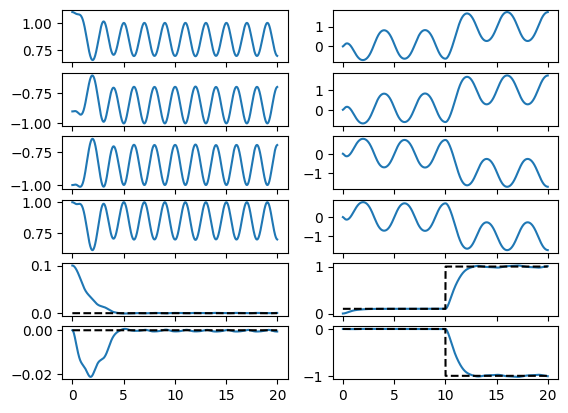

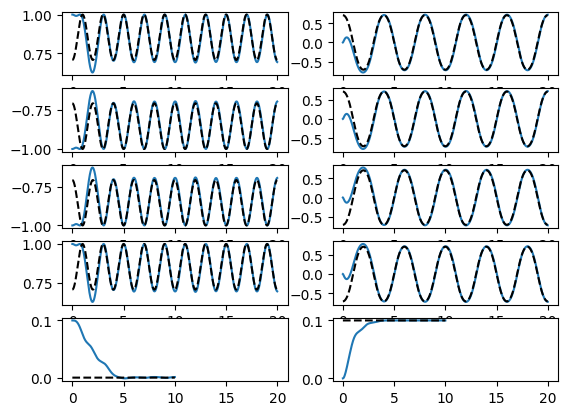

In [3]:
sim.generate_plots()

In [4]:
sim.generate_animation()